In [2]:
from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
coreset_size = 10
data_location = "data"
number_of_corsets_to_evaluate = 15
number_of_centroid_evaluation = 20

In [4]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from /home/yogi/Projects/experiments/VQA/data/dataset.pickle


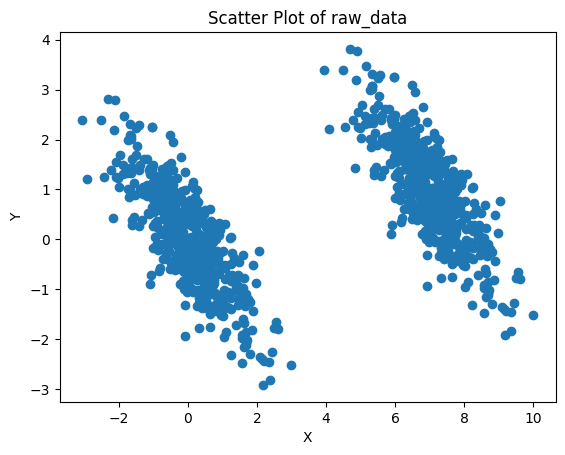

In [5]:
plt.scatter(raw_data[:, 0], raw_data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of raw data')
plt.show()


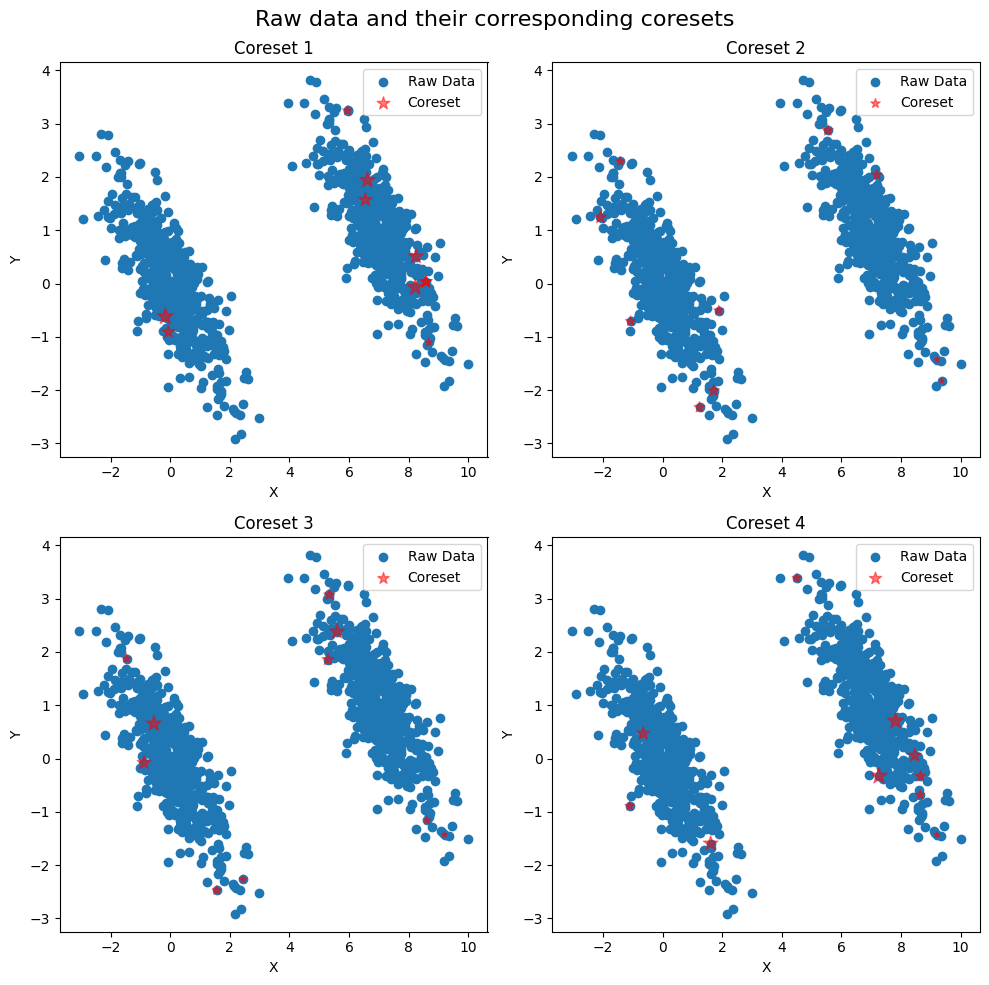

In [46]:
coreset = Coreset()
coreset_vectors, coreset_weights = coreset.get_coresets(raw_data, number_of_centroid_evaluation, coreset_size, 4)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Raw data and their corresponding coresets', fontsize=16)
for i, (coreset_vector, coreset_weights) in enumerate(zip(coreset_vectors, coreset_weights)):
    df = pd.DataFrame(coreset_vector)
    df.columns = ['X', 'Y']
    df['Weights'] = coreset_weights

    ax = axs[i // 2, i % 2]
    ax.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
    ax.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color='r', marker='*')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Coreset {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()


In [47]:

best_coreset_vectors, best_coreset_weights =  coreset.get_best_coresets(
    data_vectors=raw_data,
    number_of_runs=number_of_centroid_evaluation,
    coreset_size=coreset_size,
    size_vec_list=number_of_corsets_to_evaluate,
)

/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

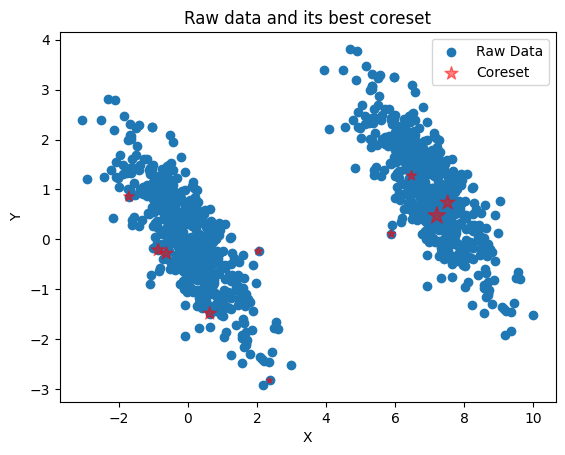

In [49]:
df = pd.DataFrame({'X': best_coreset_vectors[:,0], 'Y': best_coreset_vectors[:,1], 'Weights': best_coreset_weights})
plt.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
plt.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color = 'r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw data and its best coreset')
plt.legend()
plt.show()

